In [4]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass

from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt





# Energy inflation 

In [5]:

# Step 1: Connect to Eurostat
estat = Request('ESTAT')

# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

2025-05-31 17:57:10,235 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


Text(0, 0.5, 'Percentage Points')

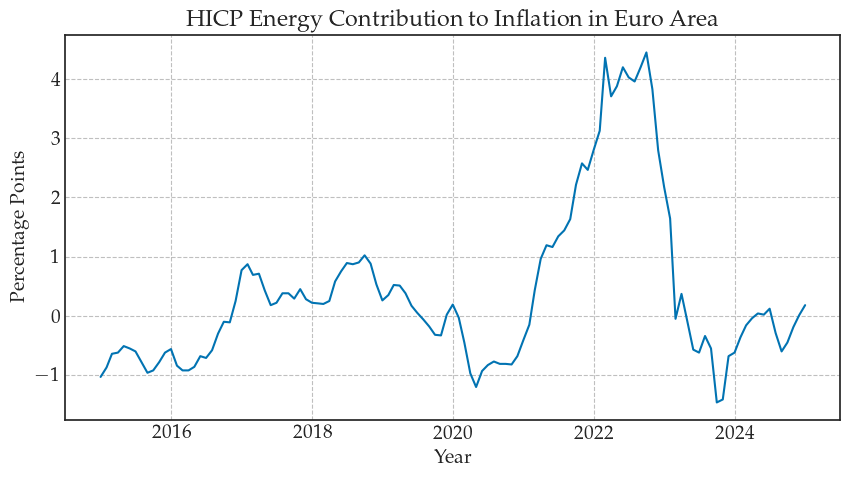

In [8]:
# Figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inf_contirbution = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inf_contirbution,  label='HICP Energy Contribution')
ax.set_title('HICP Energy Contribution to Inflation in Euro Area')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Points')

# Energy share of expenditure

In [35]:
# Step 2: Download the data
data_response = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'CP0451',   # Energy
        'quant_inc': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'],  # Income quantiles
        'TIME_PERIOD': '2015', 
        # 'feq': 'A'
        # 'freq': 'M'        # Monthly

    },
    params={
        'startPeriod': '2020',
        'endPeriod': '2020'     # Only 2015
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()
df

2025-05-31 18:29:57,310 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


,freq,quant_inc,coicop,unit,geo,TIME_PERIOD,value
0,A,D1,CP0451,PC_DI,EA,2020,5.7
1,A,D10,CP0451,PC_DI,EA,2020,1.2
2,A,D2,CP0451,PC_DI,EA,2020,3.7
3,A,D3,CP0451,PC_DI,EA,2020,3.1
4,A,D4,CP0451,PC_DI,EA,2020,2.7
5,A,D5,CP0451,PC_DI,EA,2020,2.5
6,A,D6,CP0451,PC_DI,EA,2020,2.2
7,A,D7,CP0451,PC_DI,EA,2020,2.1
8,A,D8,CP0451,PC_DI,EA,2020,1.8
9,A,D9,CP0451,PC_DI,EA,2020,1.6


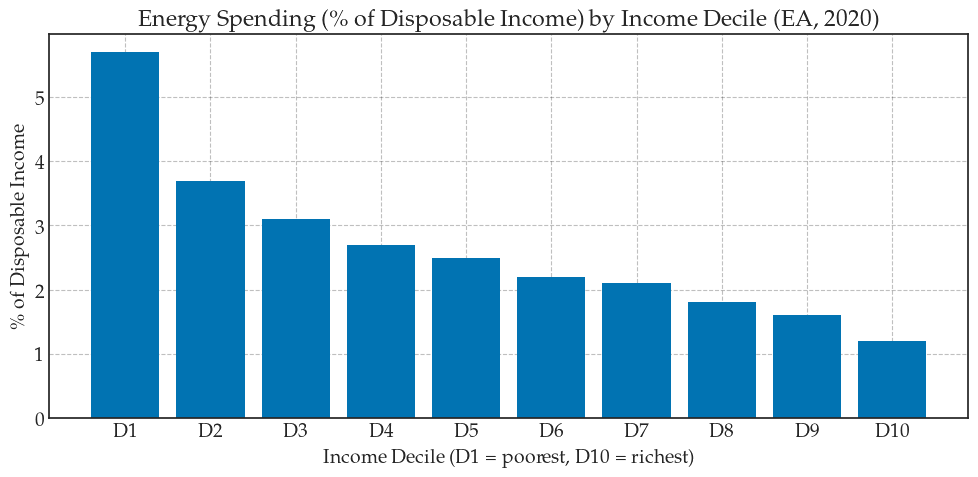

In [42]:
import matplotlib.pyplot as plt

# Sort quant_inc numerically (convert 'D1' -> 1, etc.)
df['quant_rank'] = df['quant_inc'].str.extract('D(\d+)').astype(int)

# Sort the DataFrame based on that rank
df_sorted = df.sort_values('quant_rank')


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
# Plot the sorted data
ax.bar(df_sorted['quant_inc'], df_sorted['value'])
ax.set_title('Energy Spending (\% of Disposable Income) by Income Decile (EA, 2020)')
ax.set_xlabel('Income Decile (D1 = poorest, D10 = richest)')
ax.set_ylabel('\% of Disposable Income')
fig.tight_layout()



# Energy Share

In [2]:
# https://ec.europa.eu/eurostat/databrowser/view/icw_aff_01__custom_16836538/default/table?lang=en&page=time:2020
exp_ = [129.7,	101.6,	89.6	,79.6	,66.8]
energy =[9.7,	6.3,	5.1, 	4.0 ,	2.8]

/var/folders/1t/shy39gf516g7nrfy2pmdkn780000gn/T/ipykernel_31205/4081502940.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(i, share_values,  c=colors[1], linestyle = '--', label= 'Energy share')


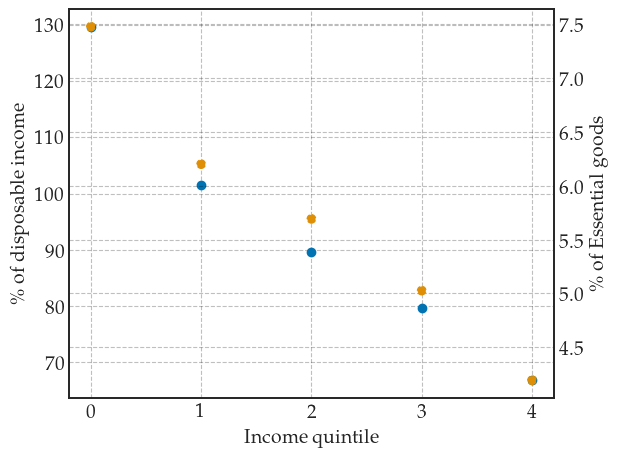

In [3]:
fig = plt.figure()


i = [0,1,2,3,4]

ax = fig.add_subplot()
ax.scatter(i, exp_, label = 'Essential goods')
ax.set_ylabel('\% of disposable income')

ax.set_xlabel('Income quintile')

share = lambda i: energy[i] / exp_[i] *100
share_values = [share(i) for i in range(len(exp_))]

ax2 = ax.twinx()
ax2.scatter(i, share_values,  c=colors[1], linestyle = '--', label= 'Energy share')
ax2.set_ylabel('\% of Essential goods')

fig.tight_layout()


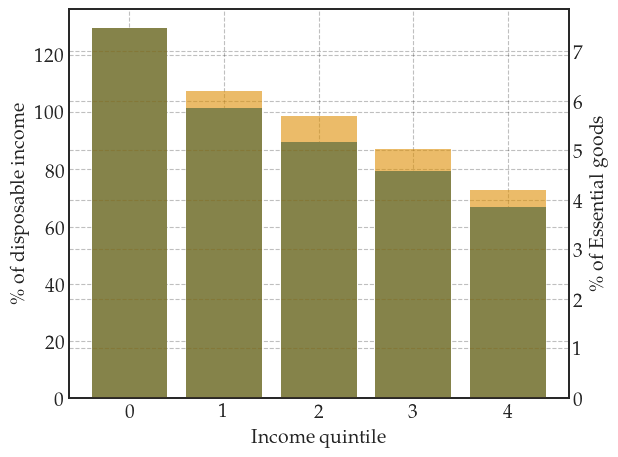

In [4]:
fig = plt.figure()

ax = fig.add_subplot()
ax.bar(range(len(exp_)), exp_, label='Essential goods')
ax.set_ylabel('\% of disposable income')
ax.set_xlabel('Income quintile')

share = lambda i: energy[i] / exp_[i] * 100
share_values = [share(i) for i in range(len(exp_))]

ax2 = ax.twinx()
ax2.bar(range(len(share_values)), share_values, color=colors[1], alpha=0.6, label='Energy share')
ax2.set_ylabel('\% of Essential goods')

fig.tight_layout()


# Inflation

Pick countries/areas 
From eurostat

https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_ctrb__custom_16920689/default/table?lang=en

things 
energy prices 
inflation 
energy share 

2025-05-31 17:55:17,377 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


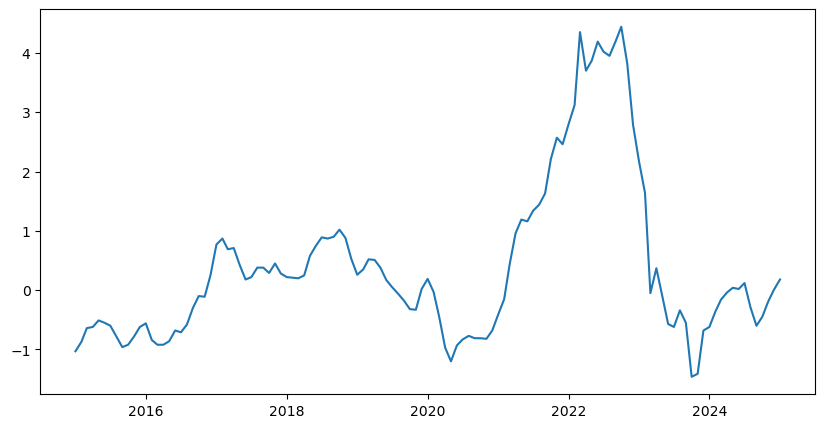

In [3]:
from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to Eurostat
estat = Request('ESTAT')

# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inf_contirbution = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inf_contirbution,  label='HICP Energy Contribution')


In [111]:
import pandasdmx as sdmx

# Create a request to Eurostat
estat = sdmx.Request('ESTAT')

# Retrieve all dataflows
dataflows_response = estat.dataflow()

# Convert the dataflows to a pandas Series for easy inspection
dataflows = sdmx.to_pandas(dataflows_response.dataflow)

# Display the first few dataflows
print(dataflows.head())


LFST_HHINDWS             Number of persons by sex, age groups, househol...
LFST_HHMGSCOMP           Number of households by migration status, work...
LFST_HHNHTYCH            Number of households by household composition,...
LFST_HHNHTYCH$DV_2142    Number of households by household composition,...
LFST_HHNHWHTC            Number of households by household composition,...
dtype: object


In [115]:
# Replace 'prc_hicp_ctrb' with the correct dataflow identifier if different
dsd_response = estat.datastructure('prc_hicp_ctrb')

# Access the data structure definition
# dsd = dsd_response.structure['prc_hicp_ctrb']

# # Display the dimensions of the dataset
# print(dsd.dimensions)


In [ ]:
import pandasdmx

# Basic test to confirm functionality
from pandasdmx import Request
estat = Request('ESTAT')
resp = estat.dataflow()

# List a few dataflows
for key, flow in list(resp.dataflow.items())[:10]:
    print(f"{key}: {flow.name['en']}")


In [125]:
# Search for the dataset with matching name
for key, flow in resp.dataflow.items():
    if 'contributions to ea annual inflation' in flow.name['en'].lower():
        print(f"{key}: {flow.name['en']}")


PRC_HICP_CTRB: HICP - contributions to EA annual inflation (in percentage points)


In [128]:
# Check available structure keys
print(dsd_response.structure.keys())


dict_keys(['PRC_HICP_CTRB'])


In [129]:
# Load the structure definition
dsd_response = estat.datastructure('PRC_HICP_CTRB')

# Print available dimension IDs
dsd = dsd_response.structure['PRC_HICP_CTRB']
for dim in dsd.dimensions.components:
    print(dim.id)


freq
unit
coicop
geo
TIME_PERIOD


In [130]:
dsd

<DataStructureDefinition ESTAT:PRC_HICP_CTRB(67.0): PRC_HICP_CTRB data structure>

In [137]:
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',        # Germany
        'coicop': 'NRG',   # All-items HICP
        'unit': 'PC_PNT',       # Contribution in percentage points
        'freq': 'M'         # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Convert to pandas DataFrame
df = data_response.to_pandas()
print(df.head())


2025-05-31 17:49:42,957 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


freq  unit    coicop  geo  TIME_PERIOD
M     PC_PNT  NRG     EA   2015-01       -1.03
                           2015-02       -0.87
                           2015-03       -0.64
                           2015-04       -0.62
                           2015-05       -0.51
Name: value, dtype: float64


In [141]:
df_reset['TIME_PERIOD']

0      2015-01
1      2015-02
2      2015-03
3      2015-04
4      2015-05
        ...   
116    2024-09
117    2024-10
118    2024-11
119    2024-12
120    2025-01
Name: TIME_PERIOD, Length: 121, dtype: object

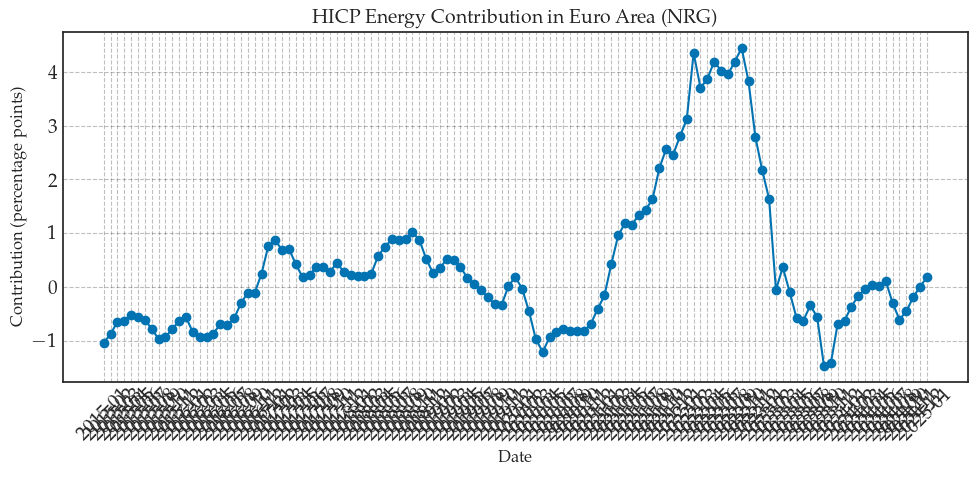

In [139]:
# Reset index if needed (depends on pandasdmx version)
df_reset = df.reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_reset['TIME_PERIOD'], df_reset['value'], marker='o', linestyle='-')

# Labels and title
plt.title('HICP Energy Contribution in Euro Area (NRG)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Contribution (percentage points)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Stop 

In [122]:
from pandasdmx import Request

# Connect to Eurostat
estat = Request('ESTAT')

# Get all dataflows
resp = estat.dataflow()

# Print the first 20 dataflow identifiers with English names
for key, flow in list(resp.dataflow.items())[:20]:
    print(f"{key}: {flow.name['en']}")


LFST_HHINDWS: Number of persons by sex, age groups, household composition and working status (1 000)
LFST_HHMGSCOMP: Number of households by migration status, working status and household composition
LFST_HHNHTYCH: Number of households by household composition, number of children and age of youngest child (1 000)
LFST_HHNHTYCH$DV_2142: Number of households by household composition, number of children and age of youngest child (1 000)
LFST_HHNHWHTC: Number of households by household composition, number of children and working status within households (1 000)
LFST_HHNHWHTC$DV_1623: Number of households by household composition, number of children and working status within households (1 000)
LFST_HHPTECHI: Percentage of part-time employment of adults by sex, age groups, number of children and age of youngest child
LFST_HHPTECHI$DV_1903: Percentage of part-time employment of adults by sex, age groups, number of children and age of youngest child
LFST_HHPTETY: Percentage of part-time employ

In [119]:
dsd = dsd_response.structure['prc_hicp_ctrb']

KeyError: 'prc_hicp_ctrb'

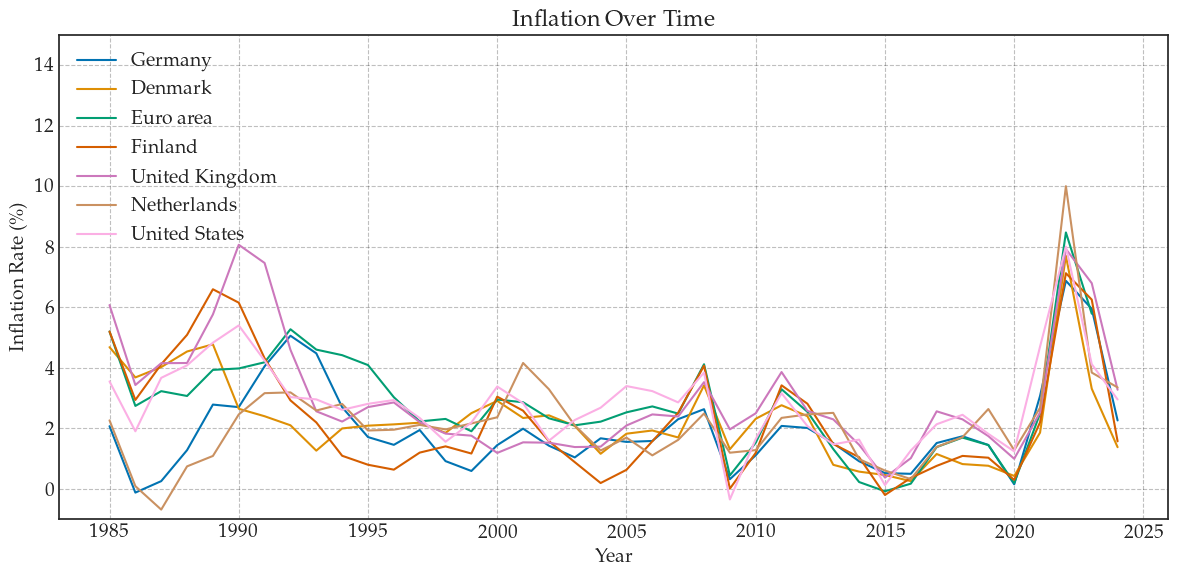

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# File path and sheet
data_place = '/Users/emmagundersen/Desktop/Current code/Other data/Inflation.xls'
sheet = 'Data'

# Load the data
data = pd.read_excel(data_place, sheet_name=sheet, header=0)

# List of countries you want to plot
# selected_countries = ['Denmark', 'Austria', 'Belgium', 'Burkina Faso']
# selected_countries = [
#      "Belgium", "Denmark",
#     "Finland", "France", "Germany",
#     "Italy",  "Netherlands",   "Spain", 
#    "United Kingdom", "United States",  "Euro area"
# ]
selected_countries = [
     "Denmark",
    "Finland", "Germany",
      "Netherlands",  
   "United Kingdom", "United States",  "Euro area", 'Wolrd', 
]

# Filter the data for selected countries
filtered_data = data[data['Country Name'].isin(selected_countries)]

# Set 'Country Name' as index for easier plotting
filtered_data.set_index('Country Name', inplace=True)

# Extract only the year columns (assuming they start at 1960 and are of type int or str)
year_columns = [col for col in filtered_data.columns if str(col).isdigit()]
filtered_data = filtered_data[year_columns]

# Transpose the data to have years on x-axis
filtered_data_T = filtered_data.transpose()



# Ensure the index is integers (years)
filtered_data_T.index = filtered_data_T.index.astype(int)

# Filter to only show data from 1980 onwards
filtered_data_T = filtered_data_T[filtered_data_T.index >= 1985]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

for country in filtered_data_T.columns:
    ax.plot(filtered_data_T.index, filtered_data_T[country], label=country)

ax.set_title('Inflation Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate (\%)')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.legend(loc='upper left')
ax.set_ylim(-1, 15)  # Adjust y-axis limits as needed
plt.grid(True)
plt.tight_layout()

fig.savefig('plots/inflation_over_time.png', dpi=300, bbox_inches='tight')

# Energy prices

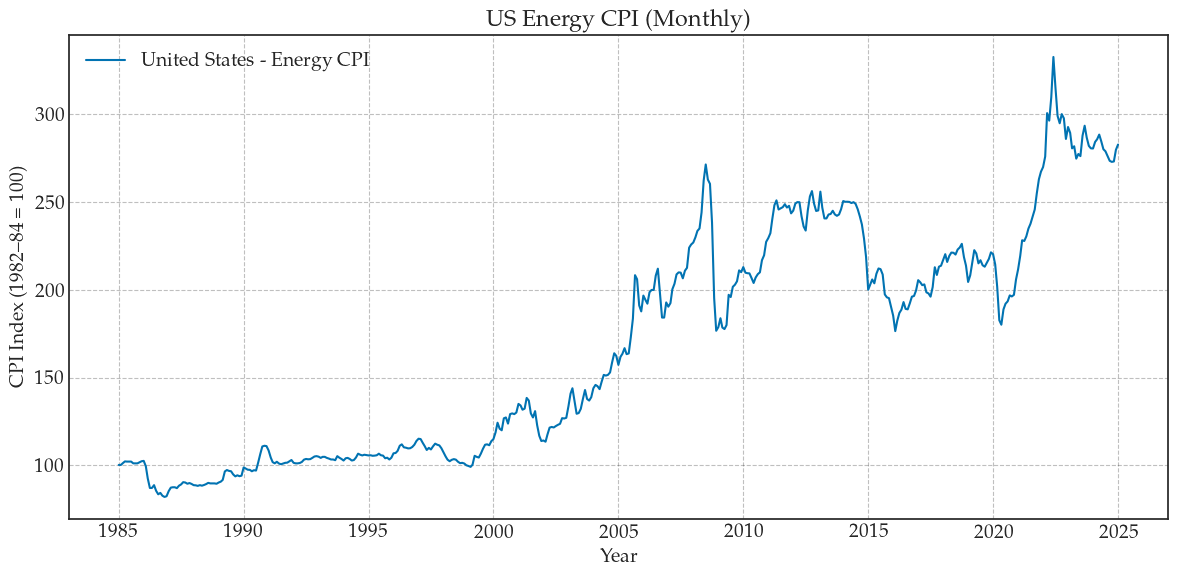

In [72]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load monthly US energy CPI data
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2025, 1, 1)
us_energy = web.DataReader('CPIENGSL', 'fred', start, end)

# Rename for clarity
us_energy.rename(columns={'CPIENGSL': 'United States - Energy CPI'}, inplace=True)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(us_energy.index, us_energy['United States - Energy CPI'], label='United States - Energy CPI')

ax.set_title('US Energy CPI (Monthly)')
ax.set_xlabel('Year')
ax.set_ylabel('CPI Index (1982–84 = 100)')

# Format x-axis to show only years
# Show only every 5th year on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

ax.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the figure
fig.savefig('plots/us_energy_cpi_monthly_year_ticks.png', dpi=300, bbox_inches='tight')


In [75]:
import pandasdmx

client = pandasdmx.Request('ESTAT')

# Get all available datasets from Eurostat
resp = client.get(resource_type='dataflow')
dataflows = resp.dataflow

# Print dataset IDs and descriptions
for key, flow in dataflows.items():
    print(f"{key}: {flow.name.en}")


HLTH_EHIS_CD1E: Persons reporting a chronic disease, by disease, sex, age and educational attainment level
HLTH_EHIS_CD1I: Persons reporting a chronic disease, by disease, sex, age and income quintile
LFST_HHACEDAY: Number of adults by sex, age groups, number of children, age of youngest child and household composition (1 000)
HLTH_EHIS_CD1U: Persons reporting a chronic disease, by disease, sex, age and degree of urbanisation
LFST_HHACEDNC: Number of adults by sex, age groups, number of children, age of youngest child and educational attainment level (1 000)
HLTH_EHIS_DE1: Body mass index (BMI) by sex, age and educational attainment level (%)
HLTH_EHIS_DE10: Frequency of alcohol consumption by sex, age and educational attainment level (%)
HLTH_EHIS_DE2: Body mass index (BMI) by sex, age and income quintile (%)
LFST_HHACWNC: Number of adults by sex, age groups, number of children, age of youngest child and working status (1 000)
HLTH_EHIS_DE3: Daily smokers of cigarettes by sex, age and

In [84]:
dsd = resp.structure['PRC_HICP_MIDX']
# Access the structure definition


# List all dimension IDs
for dim in dsd.dimensions:
    print(dim.id)

geo_codes = dsd.dimensions.get('geo').local_representation.enumerated

for code in geo_codes:
    print(code.id, "-", code.name.en)

freq
unit
coicop
geo
TIME_PERIOD
EUR - Europe
EU - European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)
EU_V - European Union (aggregate changing according to the context)
EU_V_NO - European Union (aggregate changing according to the context) and Norway
EU27_2020_EFTA - European Union - 27 countries (from 2020) and European Free Trade Association (EFTA) countries
EU27_2020_IS_K - European Union - 27 countries (from 2020) and Iceland under the Kyoto Protocol
EU27_2020 - European Union - 27 countries (from 2020)
EU28_EFTA - European Union - 28 countries (2013-2020) and European Free Trade Association (EFTA) countries
EU28_IS_K - European Union - 28 countries (2013-2020) and Iceland under the Kyoto Protocol
EU28 - European Union - 28 countries (2013-2020)
EU27_2007 - European Union - 27 countries (2007-2013)
EU25 - European Union - 25 countries (2004-2006)
EU15 - European Union - 15 countries (1995-2004)
EU15_NO - European Union 

In [89]:
import pandasdmx
import pandas as pd
import matplotlib.pyplot as plt

# Eurostat SDMX client
client = pandasdmx.Request('ESTAT')

# Country codes and names
countries = {
    'DE': 'Germany',
    'FR': 'France',
    'NL': 'Netherlands',
    'IT': 'Italy',
    'ES': 'Spain'
}

all_data = []

for code, name in countries.items():
    print(f"Fetching: {name}")
    try:
        response = client.data(
            resource_id='PRC_HICP_MIDX',
            key={
                'freq': 'M',
                'unit': 'I15',       # Index (2015 = 100)
                'coicop': 'CP-HIE',  # Energy
                'geo': code
            },
            params={'startPeriod': '2010', 'endPeriod': '2025'}
        )

        df = response.data.to_pandas().reset_index()
        df.columns = ['Time', 'Energy_Index']
        df['Time'] = pd.to_datetime(df['Time'])
        df['Country'] = name
        all_data.append(df)

    except Exception as e:
        print(f"Failed to fetch {name}: {e}")

# Only continue if data was fetched
if all_data:
    df_all = pd.concat(all_data)
    pivot_df = df_all.pivot(index='Time', columns='Country', values='Energy_Index')

    # Plot
    plt.figure(figsize=(12, 6))
    for country in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[country], label=country)

    plt.title('HICP Energy Index (2015 = 100)')
    plt.xlabel('Year')
    plt.ylabel('Index (2015 = 100)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.savefig('plots/hicp_energy_multiple_countries.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No data fetched. Please check country codes or dimension values.")


Fetching: Germany
Failed to fetch Germany: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/PRC_HICP_MIDX/M.I15.CP-HIE.DE?startPeriod=2010&endPeriod=2025
Fetching: France
Failed to fetch France: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/PRC_HICP_MIDX/M.I15.CP-HIE.FR?startPeriod=2010&endPeriod=2025
Fetching: Netherlands
Failed to fetch Netherlands: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/PRC_HICP_MIDX/M.I15.CP-HIE.NL?startPeriod=2010&endPeriod=2025
Fetching: Italy
Failed to fetch Italy: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/PRC_HICP_MIDX/M.I15.CP-HIE.IT?startPeriod=2010&endPeriod=2025
Fetching: Spain
Failed to fetch Spain: 400 Client Error: Bad Request for url: https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/PRC_HICP_MIDX/M.I15.CP-HIE.ES?star

In [97]:
import pandas as pd

url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/prc_hicp_midx$defaultview/1.0?compress=true&format=csvdata&formatVersion=1.0&lang=en&labels=label_only"

# Load gzip-compressed CSV
df = pd.read_csv(url, compression='gzip')

# Preview columns
print(df.columns)


Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'coicop', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')


In [98]:
df['coicop'].unique()
df['geo'].unique()


array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus',
       'Czechia', 'Germany', 'Denmark',
       'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)',
       'Euro area - 19 countries  (2015-2022)',
       'Euro area – 20 countries (from 2023)', 'Estonia',
       'European Economic Area (EEA18-1995, EEA28-2004, EEA30-2007, EEA31-2013, EEA30-2020)',
       'Greece', 'Spain',
       'European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)',
       'European Union - 27 countries (from 2020)', 'Finland', 'France',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'North Macedonia', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia',
       'Slovakia', 'Türkiye', 'United States', 'Albania', 'Montenegro',
       'Serbia', 'Kosovo*'], dtype=object)

In [100]:
df['coicop'].unique()

array(['All-items HICP', 'Food and non-alcoholic beverages', 'Food',
       'Bread and cereals', 'Rice'], dtype=object)